In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
scaler = StandardScaler()

In [8]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [9]:
scaled_data = scaler.fit_transform(x)

In [10]:
x = pd.DataFrame(scaled_data, columns= x.columns)

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(x_train, y_train)

LogisticRegression()

In [15]:
pred = lr.predict(x_test)

In [16]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       136
           1       0.60      0.73      0.66        56

    accuracy                           0.78       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.80      0.78      0.79       192



In [17]:
print(round(accuracy_score(pred, y_test)*100,3))

78.125


In [18]:
print(confusion_matrix(pred, y_test))

[[109  27]
 [ 15  41]]


In [19]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pred2 = knn.predict(x_test)

In [22]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       128
           1       0.65      0.69      0.67        64

    accuracy                           0.77       192
   macro avg       0.74      0.75      0.75       192
weighted avg       0.77      0.77      0.77       192



In [23]:
print(confusion_matrix(pred2, y_test))

[[104  24]
 [ 20  44]]


In [24]:
x_test.shape

(192, 8)

In [25]:
dec = DecisionTreeClassifier()

In [26]:
dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
pred3 = dec.predict(x_test)

In [28]:
print(round(accuracy_score(pred3, y_test)*100,2))

69.79


In [29]:
print(classification_report(pred3, y_test))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       110
           1       0.68      0.56      0.61        82

    accuracy                           0.70       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.70      0.70      0.69       192



In [30]:
clf = GaussianNB()

In [31]:
clf.fit(x_train, y_train)

GaussianNB()

In [32]:
pred4 = clf.predict(x_test)

In [33]:
print(round(accuracy_score(pred4, y_test)*100,2))

74.48


In [34]:
pca = PCA(n_components=2)

In [35]:
scaled_pca = pca.fit_transform(df)

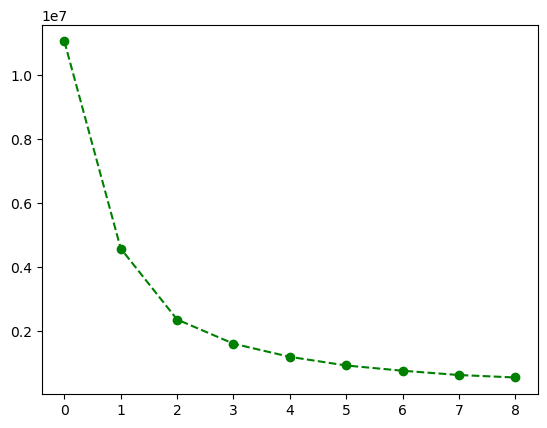

In [36]:
n_cluster = 10
loss=[]
for i in range(1,n_cluster):
    kmeans = KMeans(i)
    kmeans.fit(scaled_pca)
    loss.append(kmeans.inertia_)
plt.plot(loss,'go--')

In [37]:
kmeans = KMeans(n_clusters=2)

In [38]:
kmeans.fit(scaled_pca)

KMeans(n_clusters=2)

In [39]:
labels = kmeans.labels_

In [40]:
counts = pd.Series(labels).value_counts()
print(counts)

0    603
1    165
dtype: int64


<AxesSubplot:>

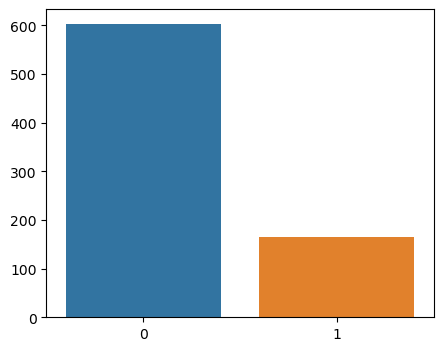

In [41]:
plt.figure(figsize=(5,4))
sns.barplot(counts.index, counts.values)

Text(0.5, 1.0, 'Clusters = 2')

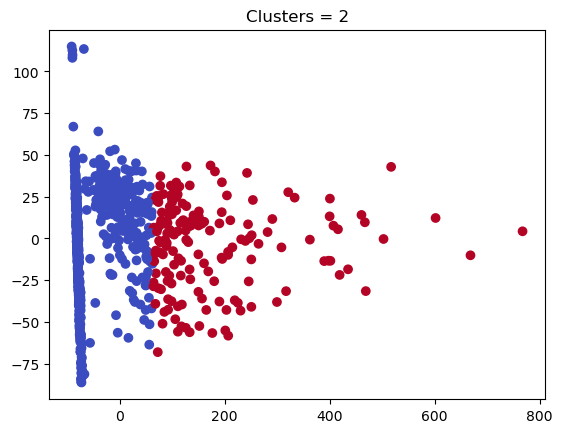

In [42]:
plt.scatter(scaled_pca[:,0], scaled_pca[:,1], c = kmeans.labels_, cmap = 'coolwarm')
plt.title('Clusters = 2')

In [43]:
round(silhouette_score(scaled_pca, labels)*100,2)

61.29